Tests that I want to run include:
* Checking if the construct is unidimensional a the macro level (sum indicator) level
* Examining the indicators to see if each sub indicator is uni-dimensional
* Seeing what happens to the distribution/number of communities included if we move to a %Population based scoring system. 

In [1]:
library(tidyverse)
library(psych)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [2]:
score_files = list.files("../data/score/csv/full", full.names = TRUE)
usa = read_csv(score_files[grepl("usa.csv", score_files)]) # read in the data


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  GEOID10_TRACT = col_character(),
  `Does the tract have at least 35 acres in it?` = col_logical(),
  `Contains agricultural value` = col_logical(),
  `Names of Tribal areas within Census tract` = col_character(),
  `Percent individuals age 25 or over with less than high school degree in 2009` = col_logical(),
  `Percentage households below 100% of federal poverty line in 2009` = col_logical(),
  `Unemployment (percent) in 2009` = col_logical(),
  `Total population in 2009` = col_logical(),
  `Number of Tribal areas within Census tract for Alaska` = col_logical(),
  `Number of Tribal areas within Census tract` = col_logical(),
  `Median household income as a percent of territory median income in 2009` = col_logical(),
  `Is there at least one abandoned mine in this census tract?` = col_logical(),
  `Income data has been estimated based on neighbor income` = col_logical(),

In [3]:
head(usa) ## take a quick look to make sure its in the right format

GEOID10_TRACT,Does the tract have at least 35 acres in it?,Contains agricultural value,Names of Tribal areas within Census tract,Housing burden (percent),Share of homes with no kitchen or indoor plumbing (percent),Total population,Median household income (% of state median household income),Current asthma among adults aged greater than or equal to 18 years,Coronary heart disease among adults aged greater than or equal to 18 years,⋯,Workforce Factor (Definition N),Total categories exceeded,Definition N (communities),Definition N (communities) (percentile),Meets the less stringent low income criterion for the adjacency index?,Definition N (communities) (average of neighbors),Is the tract surrounded by disadvantaged communities?,Definition N (communities) (based on adjacency index and low income alone),"Definition N community, including adjacency index tracts",Percentage of tract that is disadvantaged
<chr>,<lgl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<dbl>,<lgl>,<dbl>,<lgl>,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>
01073001100,TRUE,TRUE,NA,0.2752044,0.000000000,4781,0.7327450,11.2,7.2,⋯,FALSE,0,FALSE,0,TRUE,0.8571429,FALSE,FALSE,FALSE,0
01073001400,TRUE,TRUE,NA,0.1823529,0.004705882,1946,0.7136695,11.1,9.1,⋯,TRUE,6,TRUE,1,TRUE,1.0000000,TRUE,TRUE,TRUE,1
01073002000,TRUE,TRUE,NA,0.4350877,0.006872852,4080,0.5374189,13.5,9.5,⋯,TRUE,3,TRUE,1,TRUE,1.0000000,TRUE,TRUE,TRUE,1
01073003802,TRUE,TRUE,NA,0.4111406,0.038961039,5291,0.7662063,12.0,6.6,⋯,FALSE,4,TRUE,1,TRUE,1.0000000,TRUE,TRUE,TRUE,1
01073004000,TRUE,FALSE,NA,0.4683099,0.009900990,2533,0.3665704,13.1,10.0,⋯,TRUE,5,TRUE,1,TRUE,1.0000000,TRUE,TRUE,TRUE,1
01073005101,TRUE,FALSE,NA,0.5264000,0.000000000,1467,0.3133014,15.2,11.6,⋯,TRUE,6,TRUE,1,TRUE,1.0000000,TRUE,TRUE,TRUE,1


First thing that I want to do is explore just the aggregate level metrics. They are already put into groups and that is super helpful

In [4]:
## take these definitions from field_names.py
CLIMATE_THRESHOLD_EXCEEDED = "At least one climate threshold exceeded"
ENERGY_THRESHOLD_EXCEEDED = "At least one energy threshold exceeded"
TRAFFIC_THRESHOLD_EXCEEDED = "At least one traffic threshold exceeded"
HOUSING_THREHSOLD_EXCEEDED = "At least one housing threshold exceeded"
POLLUTION_THRESHOLD_EXCEEDED = "At least one pollution threshold exceeded"
WATER_THRESHOLD_EXCEEDED = "At least one water threshold exceeded"
HEALTH_THRESHOLD_EXCEEDED = "At least one health threshold exceeded"
WORKFORCE_THRESHOLD_EXCEEDED = "At least one workforce threshold exceeded"


In [29]:
macro_factors <- usa %>% 
select(contains("threshold exceeded"), GEOID10_TRACT, pop = `Total population`) %>% 
rename_with(.cols = everything()
            , .fn = ~str_replace_all(str_trim(str_replace_all(.x, "At least one|exceeded", "")), " ", "_")) %>%
mutate(across(contains("threshold"), as.numeric)) %>%
rowwise(GEOID10_TRACT) %>%
mutate(total = sum(c_across(contains("threshold")))) %>%
ungroup()

head(macro_factors)

climate_threshold,energy_threshold,traffic_threshold,housing_threshold,pollution_threshold,water_threshold,health_threshold,workforce_threshold,GEOID10_TRACT,pop,total
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
0,0,0,0,1,0,1,0,01073001100,4781,2
1,1,1,1,0,0,1,1,01073001400,1946,6
0,1,0,0,0,0,1,1,01073002000,4080,3
1,1,0,1,0,0,1,0,01073003802,5291,4
1,1,0,1,0,0,1,1,01073004000,2533,5
1,1,1,1,0,0,1,1,01073005101,1467,6


First, we run tetrachoric correlations to see which factors correlate well with other factors. (Tetrachoric correlations are designed for binary factors. They make the assumption that the binary factor is based off of a normal distribution that has been binned. this is a really fair assumption for this data because that is similar to what happened).

In [6]:
tetra_cor <- macro_factors %>% select(contains("threshold")) %>% tetrachoric
tetra_cor

Call: tetrachoric(x = .)
tetrachoric correlation 
                    clmt_ enrg_ trff_ hsng_ pllt_ wtr_t hlth_ wrkf_
climate_threshold    1.00                                          
energy_threshold     0.06  1.00                                    
traffic_threshold   -0.02  0.23  1.00                              
housing_threshold   -0.13  0.45  0.29  1.00                        
pollution_threshold -0.11  0.27  0.33  0.35  1.00                  
water_threshold     -0.09  0.26  0.32  0.73  0.35  1.00            
health_threshold     0.08  0.40  0.14  0.60  0.10  0.46  1.00      
workforce_threshold -0.06  0.49  0.30  0.76  0.33  0.62  0.61  1.00

 with tau of 
  climate_threshold    energy_threshold   traffic_threshold   housing_threshold 
               0.42                0.85                0.66                1.00 
pollution_threshold     water_threshold    health_threshold workforce_threshold 
               0.57                1.46                0.80                0.72 

* Climate is pretty independent
* Energy has some moderate, positive coincidence with housing, health, and workforce (.4-.5)
* Traffice has weak coincidence with pollution, water, and workforce (.3)
* Housing is pretty strongly related wo water and workforce (.75) and to health (.g) 
* Pollution has weaker connections to traffic, housing, water, and workforce (.3)
* Water has strong linkages to housing (.73) and workforce (.62) and moderate linkage to health (.46)
* Workforce is intertwined with housing (.76) and water & health (.6) and energy (.49)

We run a scree plot of the tetrachoric correlations. The scree plot shows hows how much of the variance is explained in different levels of factor models. We really care about the lower (hollow) line more than the principal components line. This suggests that two factors at most are probably sufficient. Although, it could be convincingly unidimensional. 

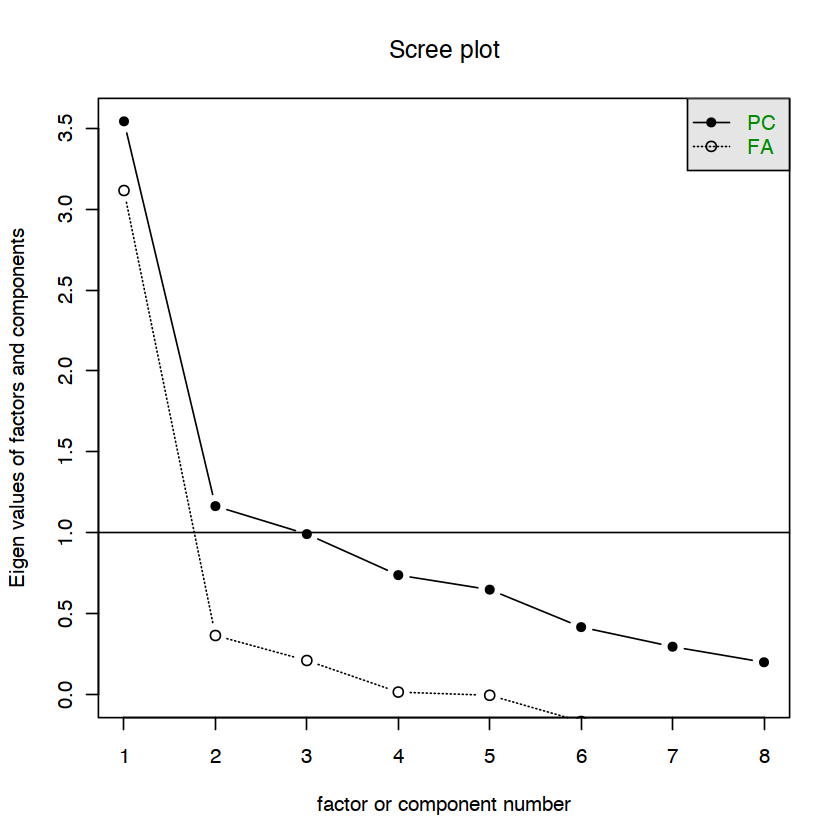

In [86]:
scree(tetra_cor[[1]])

After running the scree plot, we start to run some factor models to interrogate what is actually happening here. For all of these, I use (a) a tetrachoric correlation measure, (b) allow rotation of factors (hint, check for factor correlations) and (c) try both weighted least squares and maximum likelihood solutions for robustness

In [8]:
factor_names <- names(macro_factors)[grepl("threshold", names(macro_factors))]

In [9]:
faOut1ProWls <- fa(macro_factors[, factor_names], nfactors = 1, cor = "tet",  rotate="promax", fm="wls", SMC=TRUE)
print(faOut1ProWls, sort=TRUE)

faOut1ProMl <- fa(macro_factors[, factor_names], nfactors = 1, cor = "tet",  rotate="promax", fm="ml", SMC=TRUE)
print(faOut1ProMl, sort=TRUE)


Factor Analysis using method =  wls
Call: fa(r = macro_factors[, factor_names], nfactors = 1, rotate = "promax", 
    SMC = TRUE, fm = "wls", cor = "tet")
Standardized loadings (pattern matrix) based upon correlation matrix
                    V  WLS1     h2   u2 com
housing_threshold   4  0.91 0.8354 0.16   1
workforce_threshold 8  0.86 0.7375 0.26   1
water_threshold     6  0.75 0.5596 0.44   1
health_threshold    7  0.64 0.4087 0.59   1
energy_threshold    2  0.52 0.2690 0.73   1
pollution_threshold 5  0.41 0.1649 0.84   1
traffic_threshold   3  0.37 0.1360 0.86   1
climate_threshold   1 -0.07 0.0045 1.00   1

               WLS1
SS loadings    3.12
Proportion Var 0.39

Mean item complexity =  1
Test of the hypothesis that 1 factor is sufficient.

The degrees of freedom for the null model are  28  and the objective function was  3.03 with Chi Square of  224265.5
The degrees of freedom for the model are 20  and the objective function was  0.35 

The root mean square of the residuals

The results for the unifactor analysis are promising. It is pretty clear that the climate factor does not vary in the same way as the other factors. Energy, Pollution, and Traffic also leave much variation to be explained by this one factor. The RMSEA is higher than we'd want. So we don't think these results support a conclusion of unidimensionality. But it is not so far off that it is grossly inappropriate. 

In [10]:
faOut2ProWls <- fa(macro_factors[, factor_names], nfactors = 2, cor = "tet",  rotate="promax", fm="wls", SMC=TRUE)
print(faOut2ProWls, sort=TRUE)

faOut2ProMl <- fa(macro_factors[, factor_names], nfactors = 2, cor = "tet",  rotate="promax", fm="ml", SMC=TRUE)
print(faOut2ProMl, sort=TRUE)


Loading required namespace: GPArotation



Factor Analysis using method =  wls
Call: fa(r = macro_factors[, factor_names], nfactors = 2, rotate = "promax", 
    SMC = TRUE, fm = "wls", cor = "tet")
Standardized loadings (pattern matrix) based upon correlation matrix
                    item WLS1  WLS2   h2   u2 com
housing_threshold      4 0.91 -0.07 0.84 0.16 1.0
workforce_threshold    8 0.86  0.02 0.74 0.26 1.0
water_threshold        6 0.74 -0.07 0.56 0.44 1.0
health_threshold       7 0.66  0.17 0.45 0.55 1.1
energy_threshold       2 0.53  0.12 0.29 0.71 1.1
pollution_threshold    5 0.40 -0.11 0.18 0.82 1.2
traffic_threshold      3 0.37 -0.03 0.14 0.86 1.0
climate_threshold      1 0.01  0.94 0.88 0.12 1.0

                      WLS1 WLS2
SS loadings           3.12 0.94
Proportion Var        0.39 0.12
Cumulative Var        0.39 0.51
Proportion Explained  0.77 0.23
Cumulative Proportion 0.77 1.00

 With factor correlations of 
      WLS1  WLS2
WLS1  1.00 -0.08
WLS2 -0.08  1.00

Mean item complexity =  1.1
Test of the hypothesis

The WLS solution clearly splits cimate off onto its own factor, but the RMSEA there actually increases. The additional factor doesn't give us enough variance to justify addint it. 

The ML solution re-covers a factor that weakly contains split elements of pollution and water and a negative, but weak, loading for climate. IT does improve the RMSEA a bit. But it is still not an amazing solution. 

In [11]:
faOut3ProWls <- fa(macro_factors[, factor_names], nfactors = 3, cor = "tet",  rotate="promax", fm="wls", SMC=TRUE)
print(faOut3ProWls, sort=TRUE)

faOut3ProMl <- fa(macro_factors[, factor_names], nfactors = 3, cor = "tet",  rotate="promax", fm="ml", SMC=TRUE)
print(faOut3ProMl, sort=TRUE)


Factor Analysis using method =  wls
Call: fa(r = macro_factors[, factor_names], nfactors = 3, rotate = "promax", 
    SMC = TRUE, fm = "wls", cor = "tet")
Standardized loadings (pattern matrix) based upon correlation matrix
                    item  WLS1  WLS2  WLS3    h2   u2 com
housing_threshold      4  0.88  0.04 -0.17 0.838 0.16 1.1
health_threshold       7  0.86 -0.22  0.20 0.616 0.38 1.2
workforce_threshold    8  0.77  0.13  0.02 0.733 0.27 1.1
water_threshold        6  0.72  0.05 -0.35 0.680 0.32 1.5
pollution_threshold    5 -0.12  0.72 -0.12 0.470 0.53 1.1
traffic_threshold      3  0.03  0.45 -0.06 0.233 0.77 1.0
energy_threshold       2  0.26  0.42  0.42 0.512 0.49 2.7
climate_threshold      1 -0.01 -0.06  0.27 0.078 0.92 1.1

                      WLS1 WLS2 WLS3
SS loadings           2.71 0.99 0.46
Proportion Var        0.34 0.12 0.06
Cumulative Var        0.34 0.46 0.52
Proportion Explained  0.65 0.24 0.11
Cumulative Proportion 0.65 0.89 1.00

 With factor correlations of 

It is clear that this is a very complex system. Even after 3 factors, its only explaining 52% of the variance. 
Housing, Health, Workforce, and Water are clearly very related to eachother. Pollution, part of energy, and traffic share some variance. 
and then climate doesn't really find a good place in this model

We've analyzed how the indicators relate to eachother. Now we want to see, if we force them to be unidimensional, how do they relate to a potential sum score?

In [28]:
biserial_cor <- map_df(factor_names,
~tibble(
 var = .x
, cor =  cor.test( pull(macro_factors, !!.x), pull(macro_factors, total))$estimate[[1]]
)) %>%
arrange(desc(cor))

biserial_cor

var,cor
<chr>,<dbl>
workforce_threshold,0.6779313
housing_threshold,0.6456541
health_threshold,0.5690530
energy_threshold,0.5363731
water_threshold,0.4840263
pollution_threshold,0.4796387
traffic_threshold,0.4673516
climate_threshold,0.2589900


The result here is honestly very promising. Again, we see that scoring a point on the climate burden isn't as predictive of scoring higher points overall. But we see that the other indicators really do cling together

What does this look like in practice? Can we see if there are overall contrasts on sum score between answering yes and no on other scores? If you get one, do you usually get others? These tables have the contrast as well as the percent with sum scores above 6

In [26]:
yes_no_averages <- map_df( factor_names,
~macro_factors %>% 
    group_by(group = !!sym(.x) ) %>% 
    mutate(six = total >= 5) %>%
    summarise(
        total = mean(total)
      , count = n()
      , six = mean(as.numeric(six))
             ) %>%
    mutate(indicator = !!.x)
)

yes_no_averages %>%
select(group, total, indicator) %>%
spread(group, total) %>%
mutate(contrast = `1` - `0`,
      pct_contrast = contrast/`0`) %>%
arrange(desc(pct_contrast)) %>%
rename(
`Average Total Score for\nNo's on this Indicator` = '0' 
, `Average Total Score for\nYes's on this Indicator` = '1' 

)


yes_no_averages %>%
select(group, six, indicator) %>%
spread(group, six) %>%
mutate(contrast = `1` - `0`,
      pct_contrast = contrast/`1`) %>%
rename(
`% with total above 6 for\nNo's on this Indicator` = '0' 
, `% with no's above 6 for\nYes's on this Indicator` = '1' 
) %>%
arrange(desc(contrast))


indicator,Average Total Score for No's on this Indicator,Average Total Score for Yes's on this Indicator,contrast,pct_contrast
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
workforce_threshold,1.137333,3.753081,2.6157477,2.2998959
housing_threshold,1.295634,4.195176,2.8995418,2.2379322
water_threshold,1.532027,4.594241,3.0622140,1.9987991
health_threshold,1.270176,3.550006,2.2798305,1.7948935
energy_threshold,1.318001,3.525087,2.2070864,1.6745713
pollution_threshold,1.256561,2.994616,1.7380542,1.3831830
traffic_threshold,1.305906,3.061944,1.7560372,1.3446884
climate_threshold,1.449510,2.345186,0.8956755,0.6179159


indicator,% with total above 6 for No's on this Indicator,% with no's above 6 for Yes's on this Indicator,contrast,pct_contrast
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
water_threshold,0.044020586,0.5719895,0.52796894,0.9230395
housing_threshold,0.013484514,0.4485973,0.43511282,0.9699407
workforce_threshold,0.006315381,0.3283659,0.32205053,0.9807672
health_threshold,0.027876651,0.2839852,0.25610857,0.9018377
energy_threshold,0.032440151,0.2844822,0.25204202,0.8859677
pollution_threshold,0.031664212,0.2082940,0.17662976,0.8479831
traffic_threshold,0.037801744,0.2118482,0.17404650,0.8215622
climate_threshold,0.072909017,0.1000637,0.02715469,0.2713740


Above is another way to show a very similar thing. 

We also want to check the distribution of this score across communities

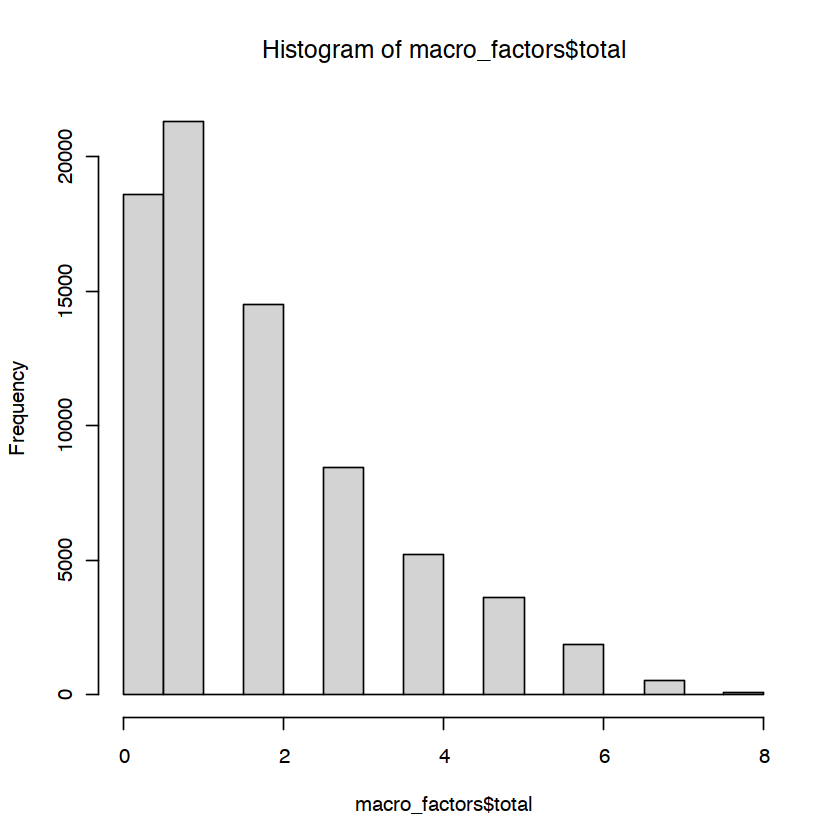

In [27]:
hist(macro_factors$total)

In [30]:
## need to edit this to get a more population-focused analysis. 
macro_factors %>% 
group_by(total) %>% 
summarise(count = n(), pop = sum(pop, na.rm = TRUE)) %>%
ungroup() %>%
mutate(
      pct = count/sum(count)
    , cumpct = cumsum(pct)
    , pct_pop = pop/sum(pop)
    , cumpct_pop = cumsum(pct_pop)
) %>%
arrange(desc(total)) %>%
mutate(
    under_sum = cumsum(pct)
   , under_sumpop = cumsum(pct_pop)

)

total,count,pop,pct,cumpct,pct_pop,cumpct_pop,under_sum,under_sumpop
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,65,163983,0.0008767907,1.0000000,0.0004995405,1.0000000,0.0008767907,0.0004995405
7,536,1704564,0.0072301508,0.9991232,0.0051926033,0.9995005,0.0081069415,0.0056921438
6,1866,6412384,0.0251706370,0.9918931,0.0195340078,0.9943079,0.0332775784,0.0252261516
5,3620,12934076,0.0488304961,0.9667224,0.0394010000,0.9747738,0.0821080746,0.0646271516
4,5195,20088230,0.0700758087,0.9178919,0.0611946574,0.9353728,0.1521838832,0.1258218091
3,8432,34800253,0.1137399844,0.8478161,0.1060118070,0.8741782,0.2659238676,0.2318336160
2,14497,62780724,0.1955512990,0.7340761,0.1912485520,0.7681664,0.4614751666,0.4230821680
1,21314,101418977,0.2875064073,0.5385248,0.3089520359,0.5769178,0.7489815739,0.7320342038
0,18609,87964518,0.2510184261,0.2510184,0.2679657962,0.2679658,1.0000000000,1.0000000000


In [ ]:
# compare to current

macro_factors 
